## To identify the Terrorist Organization based on the Terrorism Incident Info.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score
SEED = 42
np.random.seed(SEED)
import time

### Loading the Data
Loading Global Terrorism Dataset from CSV file

In [4]:
# Load the dataset
df_bl = pd.read_csv("baseline_data.csv")

### Step 1: Data Preparation

#### Pick relevant features

In [5]:
#pick features for Baseline Model
baseline_features = ['latitude','longitude','success','suicide','attacktype1','targtype1','claimed','nkill','nkillus','nkillter','nwound','nwoundus','ishostkid']

In [6]:
df_bl[baseline_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     12295 non-null  float64
 1   longitude    12295 non-null  float64
 2   success      12295 non-null  int64  
 3   suicide      12295 non-null  int64  
 4   attacktype1  12295 non-null  int64  
 5   targtype1    12295 non-null  int64  
 6   claimed      12295 non-null  int64  
 7   nkill        12295 non-null  int64  
 8   nkillus      12295 non-null  int64  
 9   nkillter     12295 non-null  int64  
 10  nwound       12295 non-null  int64  
 11  nwoundus     12295 non-null  int64  
 12  ishostkid    12295 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.2 MB


#### Map Labels

In [7]:
# Update gname(Terrorist Organization) column to numerical
df_bl['gname'] = df_bl['gname'].map({'Islamic State of Iraq and the Levant (ISIL)':0,'Taliban':1,'Taliban (Pakistan)':1,'Boko Haram':2,'Al-Qaida':3,'Al-Qaida in Iraq':3,'Al-Qaida in Saudi Arabia':3,'Al-Qaida in the Arabian Peninsula (AQAP)':3,'Al-Qaida in the Islamic Maghreb (AQIM)':3,'Al-Qaida in Yemen':3,'Al-Qaida Kurdish Battalions (AQKB)':3,'Al-Shabaab':4,'Tehrik-i-Taliban Pakistan (TTP)':5,'Al-Nusrah Front':6,'Fulani extremists':7,'Houthi extremists (Ansar Allah)':8,'Liberation Tigers of Tamil Eelam (LTTE)':9, 'Sympathizers of Al-Qaida Organization':3,'Islambouli Brigades of al-Qaida':3, 'Al-Qaida Organization for Jihad in Sweden':3,'Jadid Al-Qaida Bangladesh (JAQB)':3,'':0})

#### Check NA

In [8]:
#check for null cells
print(df_bl[baseline_features].isna().any().any())
df_bl[baseline_features].isna().any()

False


latitude       False
longitude      False
success        False
suicide        False
attacktype1    False
targtype1      False
claimed        False
nkill          False
nkillus        False
nkillter       False
nwound         False
nwoundus       False
ishostkid      False
dtype: bool

#### One-Hot Encoding for feature attacktype1,targtype1

In [9]:
df_bl_one_hot = df_bl[baseline_features]

In [10]:
#one hot encoding for feature attacktype1,targtype1
df_bl_one_hot = pd.get_dummies(df_bl_one_hot, columns = ['attacktype1','targtype1'])

In [11]:
df_bl_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       12295 non-null  float64
 1   longitude      12295 non-null  float64
 2   success        12295 non-null  int64  
 3   suicide        12295 non-null  int64  
 4   claimed        12295 non-null  int64  
 5   nkill          12295 non-null  int64  
 6   nkillus        12295 non-null  int64  
 7   nkillter       12295 non-null  int64  
 8   nwound         12295 non-null  int64  
 9   nwoundus       12295 non-null  int64  
 10  ishostkid      12295 non-null  int64  
 11  attacktype1_1  12295 non-null  uint8  
 12  attacktype1_2  12295 non-null  uint8  
 13  attacktype1_3  12295 non-null  uint8  
 14  attacktype1_4  12295 non-null  uint8  
 15  attacktype1_5  12295 non-null  uint8  
 16  attacktype1_6  12295 non-null  uint8  
 17  attacktype1_7  12295 non-null  uint8  
 18  attack

### Step 2: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [12]:
# 1)

X = df_bl_one_hot # input
y = df_bl['gname'] # output (dependent variable)

In [13]:
# 2) Splitting our data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)
# make sure stratify the y values!

#### Normalize the Data

Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

In [14]:
from sklearn.preprocessing import StandardScaler
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 3: Training & Fine-tuning the model

classifier_01:LinearSVC(max_iter=5000)<br>
classifier_011:LinearSVC,Grid Search to fine tune the hyperparameter<br>
classifier_02:SVC()<br>
classifier_021:SVC(kernel = 'rbf'),Grid Search to fine tune the hyperparameter<br>
classifier_03:SVC(kernel = 'poly',degree = 3)<br>
classifier_031:SVC(kernel = 'poly'),Grid Search to fine tune the hyperparameter

In [15]:
classifier_01 = LinearSVC(max_iter=5000)
# Train the model
classifier_01.fit(X_train, y_train)

C:\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=5000)

In [46]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV
classifier_011 = LinearSVC()
param_grid_011 = {'C': np.linspace(1, 10, 10),
              'penalty': ['l1', 'l2']}


gs_clf_011 = GridSearchCV(classifier_011,
                      param_grid_011, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf_011.fit(X_train, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf_011.best_params_, gs_clf_011.best_score_))

'{'C': 7.0, 'penalty': 'l2'}' gives the best F1-score at: 67.31%


C:\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [50]:
classifier_011 =  LinearSVC(C=7.0,penalty = 'l2')
classifier_011.fit(X_train, y_train)

C:\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=7.0)

In [53]:
classifier_02 = SVC()
classifier_02.fit(X_train, y_train)

SVC()

In [67]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
start = time.time()
classifier_021 = SVC(kernel = 'rbf')
param_grid_021 = {'C': np.array([90,100]),
              'gamma':np.logspace(-1, 0, 10)}


gs_clf_021 = GridSearchCV(classifier_021,
                      param_grid_021, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf_021.fit(X_train, y_train)
stop = time.time()
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf_021.best_params_, gs_clf_021.best_score_))
print(f"Training time: {stop - start}s")

'{'C': 100, 'gamma': 0.1}' gives the best F1-score at: 78.29%
Training time: 191.79601979255676s


In [44]:
classifier_021 = SVC(kernel = 'rbf',C=90.0)
classifier_021.fit(X_train, y_train)

SVC(C=90.0)

In [68]:
classifier_03 = SVC(kernel='poly',degree = 3)
classifier_03.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV
start = time.time()
classifier_031 = SVC(kernel = 'poly')
param_grid_031 = {'degree': np.array([3]),
              'C': np.array([1,10]),   
              'gamma':np.logspace(-1, 0, 5)}


gs_clf_031 = GridSearchCV(classifier_031,
                      param_grid_031, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf_031.fit(X_train, y_train)
stop = time.time()
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf_031.best_params_, gs_clf_031.best_score_))
print(f"Training time: {stop - start}s")

In [ ]:
classifier_031 = SVC(kernel = 'poly',C=1.0,degree=3,gamma = 1.0)
classifier_031.fit(X_train, y_train)

### Step 4: Testing the model

In [43]:
# Kept aside some data to test - X_test
y_pred_01 = classifier_01.predict(X_test)

compare_df_01 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_01})

In [44]:
compare_df_01.sample(20)

,Desired Output (Actuals),Predicted_01 Output
6582,0,0
5906,1,1
3321,3,2
1698,1,1
11913,0,0
220,1,5
11190,0,0
786,5,1
3601,1,1
10789,1,1


In [51]:
# Kept aside some data to test - X_test
y_pred_011 = classifier_011.predict(X_test)

compare_df_011 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_011})

In [ ]:
compare_df_011.sample(20)

In [54]:
# Kept aside some data to test - X_test
y_pred_02 = classifier_02.predict(X_test)

compare_df_02 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_02})

In [55]:
compare_df_02.sample(20)

,Desired Output (Actuals),Predicted_01 Output
5441,0,0
1478,1,1
10592,0,0
6270,8,8
11515,0,0
3102,3,3
3601,1,1
9242,0,0
11386,2,2
6012,0,0


In [45]:
# Kept aside some data to test - X_test
y_pred_021 = classifier_021.predict(X_test)

compare_df_021 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_021})

In [46]:
compare_df_021.sample(20)

,Desired Output (Actuals),Predicted_01 Output
5441,0,0
1478,1,1
10592,0,0
6270,8,8
11515,0,0
3102,3,8
3601,1,1
9242,0,0
11386,2,2
6012,0,0


In [69]:
# Kept aside some data to test - X_test
y_pred_03 = classifier_03.predict(X_test)

compare_df_03 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_03})

In [70]:
compare_df_03.sample(20)

,Desired Output (Actuals),Predicted_01 Output
5441,0,0
1478,1,1
10592,0,0
6270,8,4
11515,0,0
3102,3,3
3601,1,1
9242,0,0
11386,2,3
6012,0,0


### Step 5: Evaluate the model

In [45]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_01))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.99      0.90       637
           1       0.88      0.99      0.93       880
           2       0.88      1.00      0.94       188
           3       0.73      0.28      0.40       177
           4       0.98      0.97      0.98       236
           5       0.67      0.11      0.19       130
           6       0.00      0.00      0.00        24
           7       1.00      0.66      0.79        41
           8       0.82      0.90      0.86       113
           9       0.94      0.91      0.92        33

    accuracy                           0.87      2459
   macro avg       0.77      0.68      0.69      2459
weighted avg       0.85      0.87      0.84      2459




C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_011))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       637
           1       0.88      0.99      0.93       880
           2       0.86      1.00      0.92       188
           3       0.69      0.23      0.34       177
           4       0.98      0.97      0.97       236
           5       0.48      0.12      0.19       130
           6       0.00      0.00      0.00        24
           7       1.00      0.68      0.81        41
           8       0.76      0.86      0.80       113
           9       0.97      0.91      0.94        33

    accuracy                           0.86      2459
   macro avg       0.75      0.67      0.68      2459
weighted avg       0.83      0.86      0.83      2459




C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_02))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       637
           1       0.88      0.99      0.93       880
           2       0.84      0.96      0.90       188
           3       0.72      0.42      0.53       177
           4       0.91      0.95      0.93       236
           5       0.60      0.18      0.28       130
           6       0.00      0.00      0.00        24
           7       1.00      0.29      0.45        41
           8       0.81      0.77      0.79       113
           9       0.93      0.82      0.87        33

    accuracy                           0.86      2459
   macro avg       0.76      0.63      0.66      2459
weighted avg       0.84      0.86      0.83      2459




C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_021))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       637
           1       0.97      0.99      0.98       880
           2       0.97      0.98      0.98       188
           3       0.80      0.43      0.56       177
           4       0.97      0.97      0.97       236
           5       0.88      0.78      0.83       130
           6       0.46      0.46      0.46        24
           7       0.98      0.98      0.98        41
           8       0.81      0.89      0.85       113
           9       0.94      0.91      0.92        33

    accuracy                           0.92      2459
   macro avg       0.86      0.84      0.84      2459
weighted avg       0.91      0.92      0.91      2459




In [71]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_03))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       637
           1       0.87      0.92      0.89       880
           2       0.79      0.98      0.88       188
           3       0.69      0.26      0.38       177
           4       0.88      0.89      0.88       236
           5       0.76      0.15      0.25       130
           6       0.00      0.00      0.00        24
           7       0.50      0.02      0.05        41
           8       0.56      0.24      0.34       113
           9       0.88      0.42      0.57        33

    accuracy                           0.79      2459
   macro avg       0.66      0.49      0.50      2459
weighted avg       0.77      0.79      0.75      2459




C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred_021)

Confusion Matrix:


array([[612,   0,   0,  10,   1,   2,  11,   0,   0,   1],
       [  3, 867,   0,   0,   0,  10,   0,   0,   0,   0],
       [  2,   0, 185,   0,   0,   0,   0,   1,   0,   0],
       [ 71,   1,   3,  76,   3,   1,   2,   0,  20,   0],
       [  1,   0,   1,   0, 229,   0,   0,   0,   4,   1],
       [  0,  26,   0,   1,   1, 102,   0,   0,   0,   0],
       [ 12,   0,   0,   1,   0,   0,  11,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,  40,   0,   0],
       [  3,   0,   1,   7,   1,   0,   0,   0, 101,   0],
       [  0,   0,   0,   0,   2,   1,   0,   0,   0,  30]], dtype=int64)

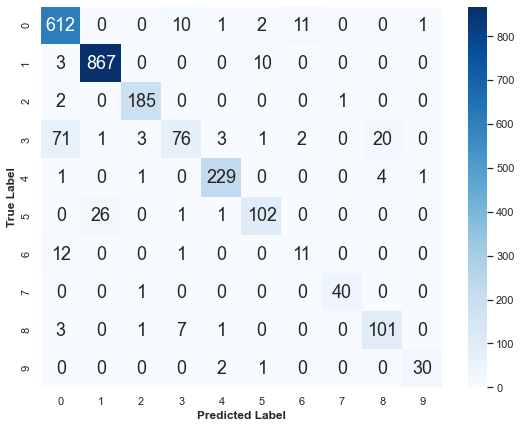

In [49]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred_021), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,fmt='g')
#                 ),xticklabels=class_names, yticklabels=class_names
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')